In [55]:
'''
ECSE 556 Homework 1
Clustering
Gian Favero
October 6th, 2023
'''

# Common imports
import numpy as np

# import data
data = np.genfromtxt('Data/gdsc_expr_postCB.csv', delimiter=',')
data = data[1:,1:]
data = np.transpose(data)

# Comment out for unscaled data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
data = scaler.transform(data)

# Clustering

Agglomerative Clustering

In [56]:
from sklearn.cluster import AgglomerativeClustering

# Construct the clustering object
agglomerative_clustering = AgglomerativeClustering(n_clusters=3)

# Fit the data
agglomerative_clustering.fit(data)

# Get the labels
agglo_labels = agglomerative_clustering.labels_

K-Means Clustering

In [57]:
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

# Construct the clustering object
k_means = KMeans(n_clusters=3)

# Fit the data
k_means.fit(data)

# Get the labels and cluster centers
k_cluster_centers = k_means.cluster_centers_
k_labels = k_means.labels_

Similarities

+---------------------------------------------------+
| Jaccard Score for Each Pair of Clusters (Default) |
+------------+------------+------------+------------+
|            | Cluster 1  | Cluster 2  | Cluster 3  |
+------------+------------+------------+------------+
| Cluster 1  |   0.009    |   0.833    |    0.0     |
| Cluster 2  |    0.0     |   0.006    |   0.982    |
| Cluster 3  |   0.954    |   0.027    |   0.001    |
+------------+------------+------------+------------+
+---------------------------------------------+
| Number of Samples in Each Cluster (Default) |
+-------------+------------------+------------+
|   Cluster   |  Agglomerative   |  K-Means   |
+-------------+------------------+------------+
|  Cluster 1  |       633        |    162     |
|  Cluster 2  |       179        |    168     |
|  Cluster 3  |       167        |    649     |
+-------------+------------------+------------+
Rand Score:  0.95
Adjusted Rand Score:  0.899


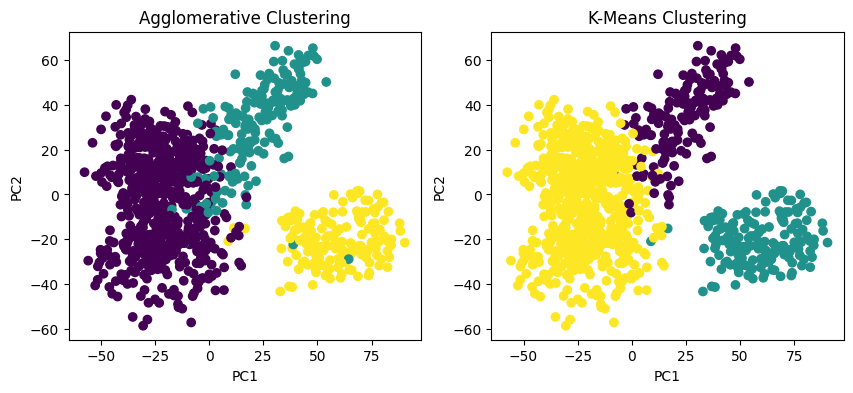

In [65]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import rand_score
from sklearn.metrics import adjusted_rand_score
import prettytable as pt

# Jaccard score for each pair of clusters
jaccards = []
for i in range(3):
    for j in range(3):
        jaccards.append(jaccard_score(agglo_labels == i, k_labels == j).round(3))

# Make table of jaccard scores
default_t = pt.PrettyTable()
default_t.field_names = ['', 'Cluster 1', 'Cluster 2', 'Cluster 3']
default_t.title = 'Jaccard Score for Each Pair of Clusters (Default)'

for i in range(3):
    default_t.add_row([f'Cluster {i+1}', jaccards[i], jaccards[i+3], jaccards[i+6]])

print(default_t)


# Make table comparing number of samples in each cluster for both clustering methods
default_prop_t = pt.PrettyTable()
default_prop_t.field_names = ['Cluster', 'Agglomerative', 'K-Means']
default_prop_t.title = 'Number of Samples in Each Cluster (Default)'
default_prop_t.add_row(['Cluster 1', np.count_nonzero(agglo_labels == 0), np.count_nonzero(k_labels == 0)])
default_prop_t.add_row(['Cluster 2', np.count_nonzero(agglo_labels == 1), np.count_nonzero(k_labels == 1)])
default_prop_t.add_row(['Cluster 3', np.count_nonzero(agglo_labels == 2), np.count_nonzero(k_labels == 2)])

print(default_prop_t)

# Rand score for agglomerative and k-means clustering
def_rand = rand_score(agglo_labels, k_labels).round(3)
print("Rand Score: ", def_rand)

# Adjusted rand score for agglomerative and k-means clustering
def_adj_rand = adjusted_rand_score(agglo_labels, k_labels).__round__(3)
print("Adjusted Rand Score: ", def_adj_rand)

# Visualize results 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
pca.fit(data)
data_pca = pca.transform(data)

# Plot agglomerative clustering results
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.scatter(data_pca[:,0], data_pca[:,1], c=agglo_labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')

# Plot k-means clustering results
plt.subplot(122)
plt.scatter(data_pca[:,0], data_pca[:,1], c=k_labels, cmap='viridis')
plt.title('K-Means Clustering')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


#### Analysis of Agglomerative Clustering

Euclidean Affinity for Agglomerative Clustering Compared with KMeans

In [59]:
# Eucledian distance
euc_agglo = AgglomerativeClustering(n_clusters=3, linkage='average', metric='euclidean')
euc_agglo.fit(data)
euc_labels = euc_agglo.labels_

# Jaccard score for each pair of clusters
euc_jaccards = []
for i in range(3):
    for j in range(3):
        euc_jaccards.append(jaccard_score(euc_labels == i, k_labels == j).round(3))

# Make table of jaccard scores
euc_t = pt.PrettyTable()
euc_t.field_names = ['', 'Cluster 1', 'Cluster 2', 'Cluster 3']
euc_t.title = 'Jaccard Score for Each Pair of Clusters (Agglomerative + Euclidean)'

for i in range(3):
    euc_t.add_row([f'Cluster {i+1}', euc_jaccards[i], euc_jaccards[i+3], euc_jaccards[i+6]])

print(euc_t)

# Rand score
euc_rand = rand_score(euc_labels, k_labels).round(3)
print("Rand Score: ", euc_rand)

# Adjusted rand score
euc_adj_rand = adjusted_rand_score(euc_labels, k_labels).__round__(3)
print("Adjusted Rand Score: ", euc_adj_rand)

+---------------------------------------------------------------------+
| Jaccard Score for Each Pair of Clusters (Agglomerative + Euclidean) |
+----------------+----------------+----------------+------------------+
|                |   Cluster 1    |   Cluster 2    |    Cluster 3     |
+----------------+----------------+----------------+------------------+
|   Cluster 1    |     0.166      |      0.0       |       0.0        |
|   Cluster 2    |     0.172      |      0.0       |       0.0        |
|   Cluster 3    |     0.661      |     0.002      |      0.002       |
+----------------+----------------+----------------+------------------+
Rand Score:  0.494
Adjusted Rand Score:  -0.003


Cosine Affinity for Agglomerative Clustering compared with KMeans

In [60]:
# Cosine distance
cos_agglo = AgglomerativeClustering(n_clusters=3, linkage='average', metric='cosine')
cos_agglo.fit(data)
cos_labels = cos_agglo.labels_

# Jaccard score for each pair of clusters
cos_jaccards = []
for i in range(3):
    for j in range(3):
        cos_jaccards.append(jaccard_score(cos_labels == i, k_labels == j).round(3))

# Make table of jaccard scores
t = pt.PrettyTable()
t.field_names = ['', 'Cluster 1', 'Cluster 2', 'Cluster 3']
t.title = 'Jaccard Score for Each Pair of Clusters (Agglomerative + Cosine)'

for i in range(3):
    t.add_row([f'Cluster {i+1}', cos_jaccards[i], cos_jaccards[i+3], cos_jaccards[i+6]])

print(t)

# Rand score
cos_rand = rand_score(cos_labels, k_labels).round(3)
print("Rand Score: ", cos_rand)

# Adjusted rand score
cos_adj_rand = adjusted_rand_score(cos_labels, k_labels).__round__(3)
print("Adjusted Rand Score: ", cos_adj_rand)

+------------------------------------------------------------------+
| Jaccard Score for Each Pair of Clusters (Agglomerative + Cosine) |
+---------------+---------------+---------------+------------------+
|               |   Cluster 1   |   Cluster 2   |    Cluster 3     |
+---------------+---------------+---------------+------------------+
|   Cluster 1   |     0.423     |      0.02     |      0.004       |
|   Cluster 2   |      0.49     |      0.0      |       0.0        |
|   Cluster 3   |     0.026     |      0.51     |      0.442       |
+---------------+---------------+---------------+------------------+
Rand Score:  0.684
Adjusted Rand Score:  0.366


Similarity between the two Agglomerative distances

In [61]:
# Jaccard score for each pair of clusters
average_jaccards = []
for i in range(3):
    for j in range(3):
        average_jaccards.append(jaccard_score(euc_labels == i, cos_labels == j).round(3))

# Make table of jaccard scores
t = pt.PrettyTable()
t.field_names = ['', 'Cluster 1', 'Cluster 2', 'Cluster 3']
t.title = 'Jaccard Score for Each Pair of Clusters'

for i in range(3):
    t.add_row([f'Cluster {i+1}', average_jaccards[i], average_jaccards[i+3], average_jaccards[i+6]])

print(t)

# Rand score
cos_rand = rand_score(euc_labels, cos_labels).__round__(3)
print("Rand Score: ", cos_rand)

# Adjusted rand score
cos_adj_rand = adjusted_rand_score(euc_labels, cos_labels).__round__(3)
print("Adjusted Rand Score: ", cos_adj_rand)

+-----------------------------------------------+
|    Jaccard Score for Each Pair of Clusters    |
+-----------+-----------+-----------+-----------+
|           | Cluster 1 | Cluster 2 | Cluster 3 |
+-----------+-----------+-----------+-----------+
| Cluster 1 |   0.351   |    0.0    |    0.0    |
| Cluster 2 |   0.353   |    0.0    |   0.003   |
| Cluster 3 |   0.296   |   0.003   |    0.0    |
+-----------+-----------+-----------+-----------+
Rand Score:  0.336
Adjusted Rand Score:  0.0


Similarity using Subset of Data

In [62]:
# Randomly selected features
import random

def random_subset(n, feat_sample, data=data):
    # Randomly select n samples
    random.seed(1)

    if feat_sample == 1:
        random_index = random.sample(range(0, data.shape[1]), n)
        random_index_data = data[:, random_index]
    elif feat_sample == 0:
        random_index = random.sample(range(0, data.shape[0]), n)
        random_index_data = data[random_index, :]

    # Agglomerative clustering with euclidean distance
    random_index_euc = AgglomerativeClustering(n_clusters=3, linkage='average', metric='euclidean')
    random_index_euc.fit(random_index_data)
    random_index_euc_labels = random_index_euc.labels_

    # Agglomerative clustering with cosine distance
    random_index_cos = AgglomerativeClustering(n_clusters=3, linkage='average', metric='cosine')
    random_index_cos.fit(random_index_data)
    random_index_cos_labels = random_index_cos.labels_

    return random_index_euc_labels, random_index_cos_labels

In [63]:
# Random features

# Conduct comparison for different values of n 
n_vals = [25, 100, 200, 300]
feature_rand_scores = []
feature_adj_rand_scores = []

for n in n_vals:
    # Randomly select m features
    random_feat_euc_labels, random_feat_cos_labels = random_subset(n, 1)
    feature_rand_scores.append(rand_score(random_feat_euc_labels, random_feat_cos_labels).__round__(3))
    feature_adj_rand_scores.append(adjusted_rand_score(random_feat_euc_labels, random_feat_cos_labels).__round__(3))

# Make table of Rand and Adjusted Rand scores
feat_t = pt.PrettyTable()
feat_t.field_names = ['Number of Features', 'Rand Score', 'Adjusted Rand Score']
feat_t.title = 'Rand and Adjusted Rand Scores for Randomly Selected Features'
for i in range(len(n_vals)):
    feat_t.add_row([n_vals[i], feature_rand_scores[i], feature_adj_rand_scores[i]])
print(feat_t)


+--------------------------------------------------------------+
| Rand and Adjusted Rand Scores for Randomly Selected Features |
+----------------------+-------------+-------------------------+
|  Number of Features  |  Rand Score |   Adjusted Rand Score   |
+----------------------+-------------+-------------------------+
|          25          |    0.374    |          -0.001         |
|         100          |     0.38    |           -0.0          |
|         200          |    0.339    |           0.0           |
|         300          |    0.335    |           -0.0          |
+----------------------+-------------+-------------------------+


In [64]:
# Random samples

# Conduct comparison for different values of n 
n_vals = [25, 100, 200, 300]
sample_rand_scores = []
sample_adj_rand_scores = []

for n in n_vals:
    # Randomly select n samples
    random_sample_euc_labels, random_sample_cos_labels = random_subset(n, 0)
    sample_rand_scores.append(rand_score(random_sample_euc_labels, random_sample_cos_labels).__round__(3))
    sample_adj_rand_scores.append(adjusted_rand_score(random_sample_euc_labels, random_sample_cos_labels).__round__(3))

# Make table of Rand and Adjusted Rand scores
sample_t = pt.PrettyTable()
sample_t.field_names = ['Number of samples', 'Rand Score', 'Adjusted Rand Score']
sample_t.title = 'Rand and Adjusted Rand Scores for Randomly Selected Samples'
for i in range(len(n_vals)):
    sample_t.add_row([n_vals[i], sample_rand_scores[i], sample_adj_rand_scores[i]])
print(sample_t)

+-------------------------------------------------------------+
| Rand and Adjusted Rand Scores for Randomly Selected Samples |
+---------------------+-------------+-------------------------+
|  Number of samples  |  Rand Score |   Adjusted Rand Score   |
+---------------------+-------------+-------------------------+
|          25         |    0.427    |          0.048          |
|         100         |    0.343    |          0.002          |
|         200         |    0.342    |          -0.001         |
|         300         |    0.336    |          -0.001         |
+---------------------+-------------+-------------------------+
